Only a back up here.
See github.com/LicoriceLin/ontogpt : /tests/output/evan/compare.ipynb for the usage 

In [13]:
# env: llm (evan-env.yml) 
import yaml
c_ori=yaml.load(open('curate.yaml','r'),yaml.FullLoader)['raw_completion_output']
c_dict=dict()
for l in c_ori.split('\n'):
    entry,values=l.split(': ')
    c_dict[entry]=values.split(';')
    if entry=='gene_gene_interactions':
        c_dict[entry]=[set(i.split('-')) for i in c_dict[entry]]

In [14]:
import yaml
o_ori=yaml.load(open('origin.yaml','r'),yaml.FullLoader)['raw_completion_output']
o_dict=dict()
for l in o_ori.split('\n'):
    entry,values=l.split(': ')
    o_dict[entry]=values.split(';')
    if entry=='gene_gene_interactions':
        o_dict[entry]=[set(i.split('-')) for i in o_dict[entry]]

In [6]:
m_dict={}
def temp(i0:str):
    i0=i0.strip()
    if i0.endswith('17A') or i0.endswith('15A'):
        return i0[:-4]+'_'+i0[-4:]
    else:
        return i0
for i in ['genes','gene_variances','gene_gene_interactions']:
    m_dict[i]=[]
for i in open('../../input/evan/rho_origin.txt','r').readlines():
    if 'interacts with' in i:
        m_dict['gene_gene_interactions'].append(set([temp(_) for _ in  i.strip().split('interacts with')]))
    elif i.startswith('Variant:'):
        i_=i.strip('Variant:').strip().strip(',')
        m_dict['gene_variances'].append(i_[:-4]+'_'+i_[-4:])
    elif i.startswith('Protein:'):
        i_=i.strip('Protein:').strip().strip(',')
        m_dict['genes'].append(i_)

<Axes: >

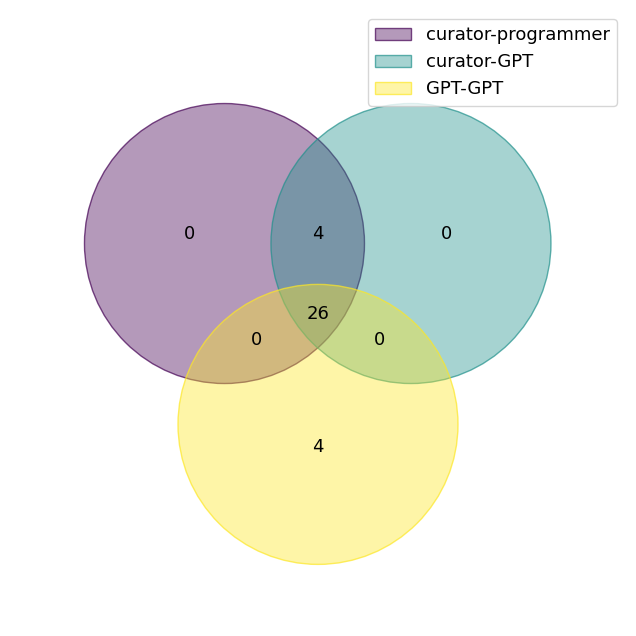

In [19]:
from venn import venn
venn({'curator-programmer':set(m_dict['genes']),
      'curator-GPT':set(c_dict['genes']),
      'GPT-GPT':set(o_dict['genes'])
      })

<Axes: >

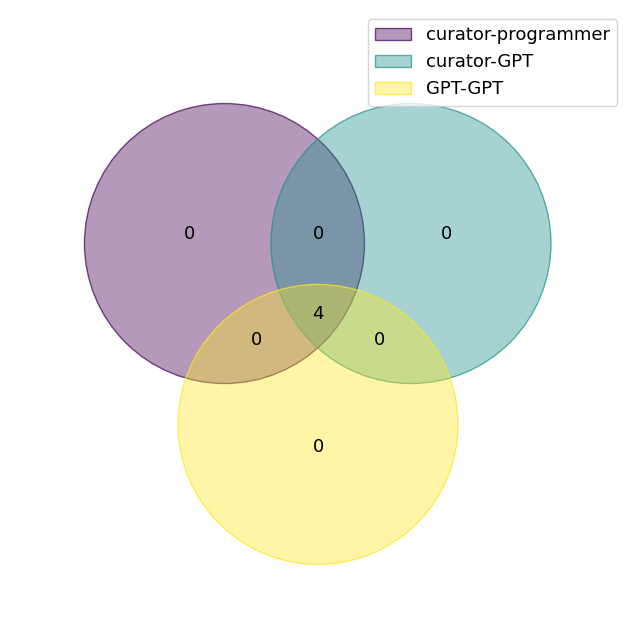

In [18]:
from venn import venn
venn({'curator-programmer':set(m_dict['gene_variances']),
      'curator-GPT':set(c_dict['gene_variances']),
      'GPT-GPT':set(o_dict['gene_variances'])
      })

<Axes: >

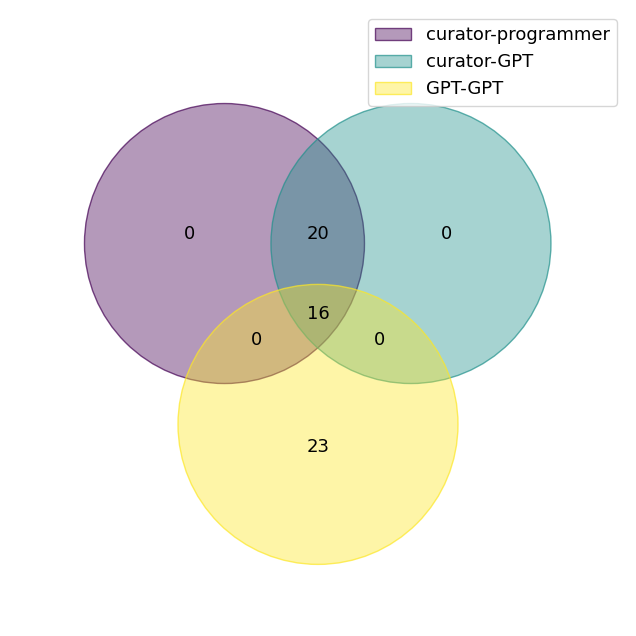

In [20]:
from venn import venn
# data varies during different run.
def tmp(i):
      i1=[list(_) for _ in i['gene_gene_interactions']]
      [_.sort() for _ in i1]
      return set(["*".join(_) for _ in i1])
tmp(m_dict)
venn({'curator-programmer':tmp(m_dict),
      'curator-GPT':tmp(c_dict),
      'GPT-GPT':tmp(o_dict)
      })